Goals:
  * Review the environment to ensure it's up to standards
    * Implement a simple reward function of -1 at each step
  * Implement policy evaluation
  * Implement policy iteration
  * Visualize the results of these algorithms in some way

Create an environment simulating escape the room with 2 "attractors" networks connected by a long chain.

In [1]:
from collections import Counter
import logging
from random import randint

import matplotlib.pyplot as plt
import numpy as np

from utils import *

%matplotlib inline

# Set debug level
logging.basicConfig(level=logging.CRITICAL)

#### Create the state and action spaces and transition model $P_{s s'}^{\ a}$

In [7]:
states = [i for i in range(19)]
actions = [i for i in range(3)]

print('States: ', states)
print('Actions: ', actions)

def get_transition_model(states, actions, alpha, beta):
    """
    Returns a list of tuples where each tuple contains
    (state s, action a, state s', Pr(s_{t+1}=s' | s_t = s, a_t = a))
    
    Runs test to ensure the probabilities are valid.
    """
    transition = [
        (states[0], actions[0], states[0], 1),
        (states[0], actions[1], states[1], alpha),
        (states[0], actions[1], states[2], 1-alpha),
        (states[0], actions[2], states[2], beta),
        (states[0], actions[2], states[3], 1-beta),

        (states[1], actions[0], states[0], 1),
        (states[1], actions[1], states[2], alpha),
        (states[1], actions[1], states[3], 1-alpha),
        (states[1], actions[2], states[5], beta),
        (states[1], actions[2], states[6], 1-beta),

        (states[2], actions[0], states[0], 1),
        (states[2], actions[1], states[1], alpha),
        (states[2], actions[1], states[3], 1-alpha),
        (states[2], actions[2], states[7], beta),
        (states[2], actions[2], states[8], 1-beta),

        (states[3], actions[0], states[0], 1),
        (states[3], actions[1], states[1], alpha),
        (states[3], actions[1], states[2], 1-alpha),
        (states[3], actions[2], states[4], beta),
        (states[3], actions[2], states[9], 1-beta),

        (states[4], actions[0], states[3], 1),
        (states[4], actions[1], states[5], alpha),
        (states[4], actions[1], states[6], 1-alpha),
        (states[4], actions[2], states[8], beta),
        (states[4], actions[2], states[9], 1-beta),

        (states[5], actions[0], states[1], 1),
        (states[5], actions[1], states[6], alpha),
        (states[5], actions[1], states[7], 1-alpha),
        (states[5], actions[2], states[4], beta),
        (states[5], actions[2], states[9], 1-beta),

        (states[6], actions[0], states[1], 1),
        (states[6], actions[1], states[7], alpha),
        (states[6], actions[1], states[8], 1-alpha),
        (states[6], actions[2], states[4], beta),
        (states[6], actions[2], states[5], 1-beta),

        (states[7], actions[0], states[2], 1),
        (states[7], actions[1], states[8], alpha),
        (states[7], actions[1], states[9], 1-alpha),
        (states[7], actions[2], states[5], beta),
        (states[7], actions[2], states[6], 1-beta),

        (states[8], actions[0], states[2], 1),
        (states[8], actions[1], states[6], alpha),
        (states[8], actions[1], states[7], 1-alpha),
        (states[8], actions[2], states[4], beta),
        (states[8], actions[2], states[9], 1-beta),

        (states[9], actions[0], states[3], 1),
        (states[9], actions[1], states[4], alpha),
        (states[9], actions[1], states[5], 1-alpha),
        (states[9], actions[2], states[8], beta),
        (states[9], actions[2], states[10], 1-beta),

        (states[10], actions[0], states[9], 1),
        (states[10], actions[1], states[9], alpha),
        (states[10], actions[1], states[11], 1-alpha),
        (states[10], actions[2], states[9], beta),
        (states[10], actions[2], states[11], 1-beta),

        (states[11], actions[0], states[10], 1),
        (states[11], actions[1], states[10], alpha),
        (states[11], actions[1], states[12], 1-alpha),
        (states[11], actions[2], states[10], beta),
        (states[11], actions[2], states[12], 1-beta),

        (states[12], actions[0], states[11], 1),
        (states[12], actions[1], states[11], alpha),
        (states[12], actions[1], states[13], 1-alpha),
        (states[12], actions[2], states[11], beta),
        (states[12], actions[2], states[13], 1-beta),

        (states[13], actions[0], states[12], 1),
        (states[13], actions[1], states[12], alpha),
        (states[13], actions[1], states[14], 1-alpha),
        (states[13], actions[2], states[12], beta),
        (states[13], actions[2], states[14], 1-beta),

        (states[14], actions[0], states[13], 1),
        (states[14], actions[1], states[13], alpha),
        (states[14], actions[1], states[15], 1-alpha),
        (states[14], actions[2], states[13], beta),
        (states[14], actions[2], states[17], 1-beta),

        (states[15], actions[0], states[18], 1),
        (states[15], actions[1], states[14], 1),
        (states[15], actions[2], states[16], 1),

        (states[16], actions[0], states[18], 1),
        (states[16], actions[1], states[15], 1),
        (states[16], actions[2], states[17], 1),

        (states[17], actions[0], states[18], 1),
        (states[17], actions[1], states[14], 1),
        (states[17], actions[2], states[16], 1),

        (states[18], actions[0], states[18], 1),
        (states[18], actions[1], states[14], 1),
        (states[18], actions[2], states[15], 1),

    ]
    
    test_transition_model(states, actions, get_transition_model(.3, .4))
    
    return transition


States:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Actions:  [0, 1, 2]


{0: 215, 1: 88, 2: 155, 3: 142, 4: 38, 5: 54, 6: 50, 7: 51, 8: 53, 9: 75, 10: 31, 11: 21, 12: 11, 13: 8, 14: 5, 15: 1, 16: 1, 17: 2, 18: 0}


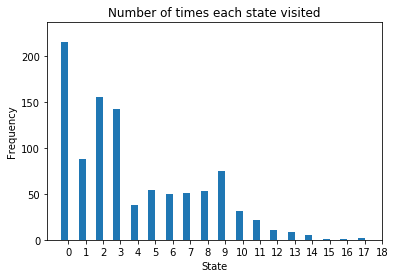

In [38]:
def simple_reward()

def random_policy(s, actions):
    """Given a state return a random action uniformly from action set"""
    return actions[randint(0, len(actions)-1)]

def move(s, a, model):
    """ Given state, action, and transition model, return a state s' and reward r """
    # tuple of possible states s' given state s and action a
    transitions = [t for t in model if t[0] == s and t[1] == a]
    # just probabilities of transitioning to s' given s and a
    transitions_probs = [t[3] for t in transitions]
    # pick a transition randomly according to these probabilities
    choice = np.random.choice(len(transitions_probs), p=transitions_probs)
    s_prime_tuple = transitions[choice]
    
    logging.debug('Taking action {} in state {}'.format(a, s))
    logging.debug('Possible transitions: {}'.format(transitions))
    logging.debug('Picked {}'.format(s_prime_tuple))
    
    # TODO return the  reward here
    return s_prime_tuple[2], 0 # s_prime_tuple[4]

def random_trajectory(model, s_0=states[0], num_iters=1000):
    """TODO improve documentation"""
    # total reward accumulated
    total_reward = []

    s = s_0

    # record states visited and actions taken
    state_history = [s]
    action_history = []

    for _ in range(num_iters):
        # generate action
        a = random_policy(s, actions)
        # make move
        s_prime, reward = move(s, a, model)

        # record the action a, state s', and reward r
        state_history.append(s_prime)
        action_history.append(a)
        total_reward.append(reward)

        s = s_prime
    
    return (state_history)

# Derive state history for some model and plot frequency chart
state_history = random_trajectory(get_transition_model(.3, .4))
plot_state_history(state_history, states)

Alpha = 0.25, Beta = 0.25
{0: 168, 1: 78, 2: 132, 3: 128, 4: 30, 5: 46, 6: 36, 7: 36, 8: 59, 9: 95, 10: 33, 11: 25, 12: 24, 13: 28, 14: 31, 15: 15, 16: 10, 17: 13, 18: 14}


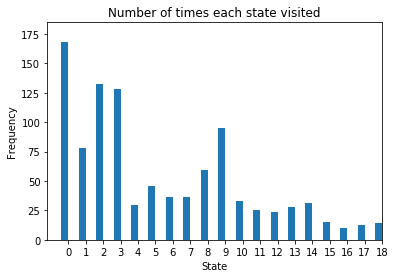

Alpha = 0.25, Beta = 0.5
{0: 158, 1: 86, 2: 154, 3: 140, 4: 57, 5: 71, 6: 45, 7: 60, 8: 58, 9: 89, 10: 19, 11: 16, 12: 17, 13: 15, 14: 11, 15: 1, 16: 0, 17: 3, 18: 1}


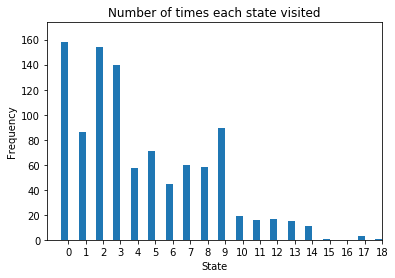

Alpha = 0.25, Beta = 0.75
{0: 216, 1: 71, 2: 207, 3: 128, 4: 81, 5: 42, 6: 41, 7: 77, 8: 70, 9: 45, 10: 7, 11: 3, 12: 4, 13: 5, 14: 3, 15: 0, 16: 0, 17: 1, 18: 0}


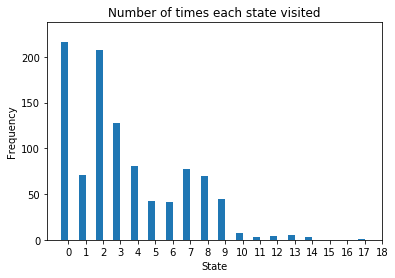

Alpha = 0.25, Beta = 1.0
{0: 209, 1: 83, 2: 217, 3: 126, 4: 90, 5: 73, 6: 29, 7: 96, 8: 53, 9: 25, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


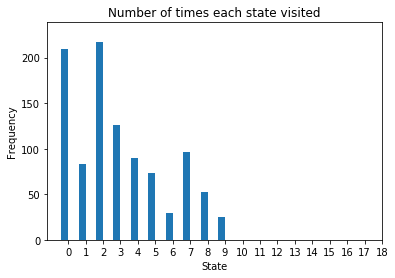

Alpha = 0.5, Beta = 0.25
{0: 174, 1: 111, 2: 116, 3: 125, 4: 38, 5: 62, 6: 60, 7: 37, 8: 60, 9: 110, 10: 49, 11: 28, 12: 19, 13: 10, 14: 2, 15: 0, 16: 0, 17: 0, 18: 0}


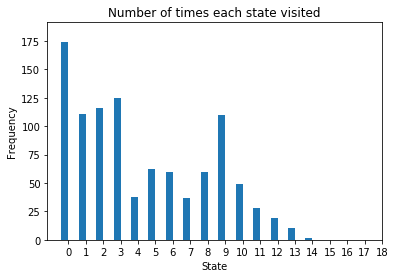

Alpha = 0.5, Beta = 0.5
{0: 211, 1: 107, 2: 143, 3: 125, 4: 53, 5: 62, 6: 50, 7: 56, 8: 66, 9: 83, 10: 29, 11: 10, 12: 4, 13: 2, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


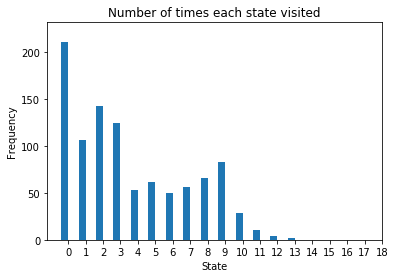

Alpha = 0.5, Beta = 0.75
{0: 217, 1: 117, 2: 176, 3: 110, 4: 85, 5: 75, 6: 51, 7: 76, 8: 57, 9: 35, 10: 2, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


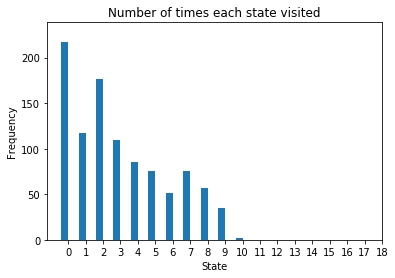

Alpha = 0.5, Beta = 1.0
{0: 190, 1: 125, 2: 187, 3: 89, 4: 89, 5: 99, 6: 37, 7: 102, 8: 67, 9: 16, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


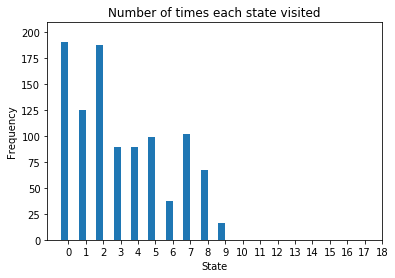

Alpha = 0.75, Beta = 0.25
{0: 185, 1: 133, 2: 108, 3: 128, 4: 43, 5: 40, 6: 69, 7: 39, 8: 65, 9: 101, 10: 41, 11: 24, 12: 12, 13: 8, 14: 5, 15: 0, 16: 0, 17: 0, 18: 0}


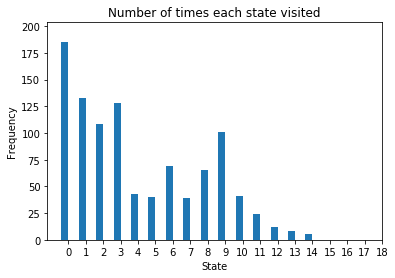

Alpha = 0.75, Beta = 0.5
{0: 221, 1: 159, 2: 137, 3: 105, 4: 51, 5: 55, 6: 86, 7: 61, 8: 57, 9: 56, 10: 12, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


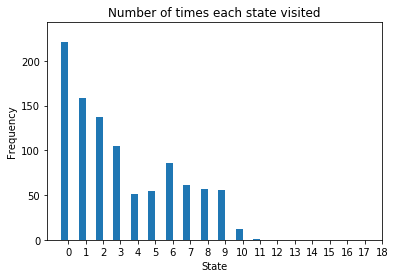

Alpha = 0.75, Beta = 0.75
{0: 203, 1: 165, 2: 160, 3: 86, 4: 77, 5: 89, 6: 55, 7: 69, 8: 61, 9: 35, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


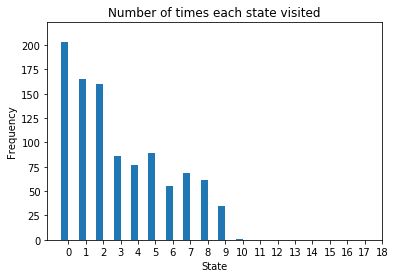

Alpha = 0.75, Beta = 1.0
{0: 203, 1: 162, 2: 160, 3: 68, 4: 89, 5: 106, 6: 59, 7: 83, 8: 61, 9: 10, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


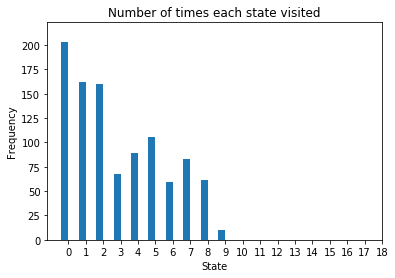

Alpha = 1.0, Beta = 0.25
{0: 180, 1: 184, 2: 92, 3: 88, 4: 60, 5: 68, 6: 96, 7: 42, 8: 54, 9: 97, 10: 32, 11: 7, 12: 1, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


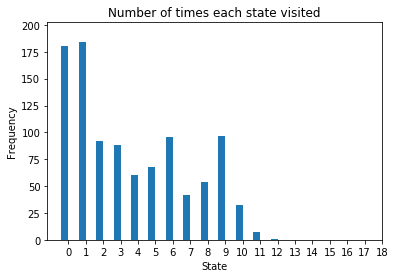

Alpha = 1.0, Beta = 0.5
{0: 214, 1: 184, 2: 133, 3: 72, 4: 64, 5: 70, 6: 84, 7: 51, 8: 59, 9: 53, 10: 13, 11: 4, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


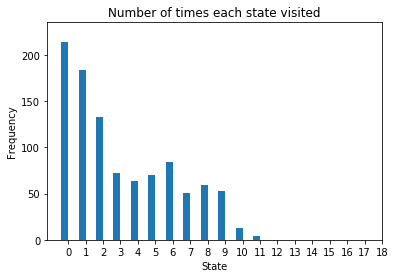

Alpha = 1.0, Beta = 0.75
{0: 240, 1: 196, 2: 154, 3: 48, 4: 68, 5: 101, 6: 70, 7: 74, 8: 39, 9: 11, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


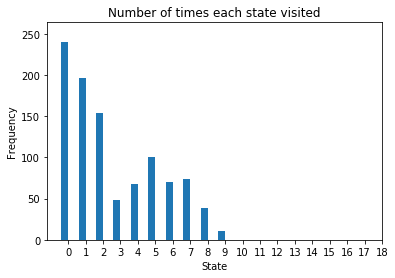

Alpha = 1.0, Beta = 1.0
{0: 224, 1: 179, 2: 190, 3: 26, 4: 93, 5: 99, 6: 50, 7: 71, 8: 69, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}


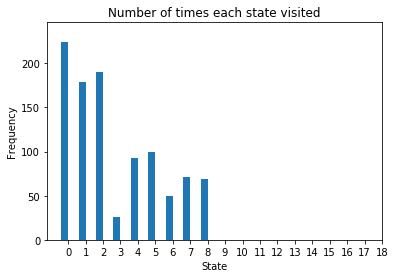

In [36]:
# Plots of frequency of state visits for different alpha, beta
for alpha, beta in  itertools.product(np.linspace(.25, 1, 4), repeat=2):
    model = get_transition_model(alpha, beta)
    state_history = random_trajectory(model)
    print('Alpha = {}, Beta = {}'.format(alpha, beta))
    plot_state_history(state_history, states)